In [1]:
%pip install scikit-plot
%pip install imbalanced-learn
%pip install plotly
%pip install scipy==1.11.4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
#sets pandas dataframe max columns
pd.set_option('display.max_columns', None)
import re
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import plotly.express as px
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE #for oversampling
from sklearn.feature_selection import RFE #for feature selection
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import scikitplot as skplt #for plotting the results
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV #for hyperparameter optimization

ModuleNotFoundError: No module named 'seaborn'

In [3]:
df = pd.read_csv('PDFMalware2022.csv',header=0)
print(df.shape)
print(list(df.columns))

(10026, 33)
['File name', 'pdfsize', 'metadata size', 'pages', 'xref Length', 'title characters', 'isEncrypted', 'embedded files', 'images', 'text', 'header', 'obj', 'endobj', 'stream', 'endstream', 'xref', 'trailer', 'startxref', 'pageno', 'encrypt', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode', 'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'Colors', 'Class']


In [5]:
df = df.drop(df[df['Class'].isnull()].index.tolist(), axis=0)
df = df.drop(df[df['endobj'] == 'pdfid.py'].index.tolist(), axis=0)
df = df.fillna(0)
df = df.replace([-1, -1.00],0)

In [6]:
df["Class"] = np.where(df["Class"].str.contains("Malicious"), 1, 0)
df["text"] = np.where(df["text"].str.contains("Yes"), 1, 0)

In [8]:
def header_obj(col):
  match = re.search('%PDF-\d*.?\d*', col)
  if match:
    return 1
  return 0

df['header'] = df['header'].apply(lambda col: header_obj(col))

In [9]:
df.groupby('Class')[df.select_dtypes(include=['number']).columns].mean()


,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,stream,trailer,encrypt,ObjStm,JS,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
Class,,,,,,,,,,,,,,,,,,,,,,,,,,
0,108.566473,318.296329,5.081916,238.195166,13.370859,0.009848,0.000448,4.227171,0.643688,0.992614,33.058639,1.553044,0.012086,3.100269,0.329902,0.381379,0.621531,0.055282,0.593330,0.090868,0.000000,0.000895,0.626902,0.001343,2.914727,0.0
1,69.796748,347.386811,2.101897,4768.472809,82.487805,0.008672,0.042276,0.664679,0.159530,0.908762,4.814092,1.023487,0.009214,0.341825,1.088528,1.439747,0.070822,0.525926,0.229088,0.005239,0.012285,0.023487,0.493767,0.096838,1.528275,1.0


In [10]:
fig = px.scatter(x=df['pdfsize'], y=df['metadata size'], color=df['Class'], 
                 labels={'x':'PDF Size', 'y':'Metadata size', 'color':'Class'}, title='PDF Size vs Metadata size')
fig.show()

In [7]:


img = df.images
imgs={'0':0,'1-5':0,'6-20':0,'21-50':0,'>50':0}
for i in img:
    if i == '1(1)':
        next
    elif int(i) == 0:
        imgs['0']+=1
    elif int(i)>0 and int(i)<6:
        imgs['1-5']+=1
    elif int(i)>5 and int(i)<21:
        imgs['6-20']+=1
    elif int(i)>20 and int(i)<51:
        imgs['21-50']+=1
    else:
        imgs['>50']+=1

imgs_df = pd.DataFrame(imgs.items())
imgs_df.columns=['Category','Count']

px.histogram(imgs_df, x='Category', y='Count', title='Images in PDF')

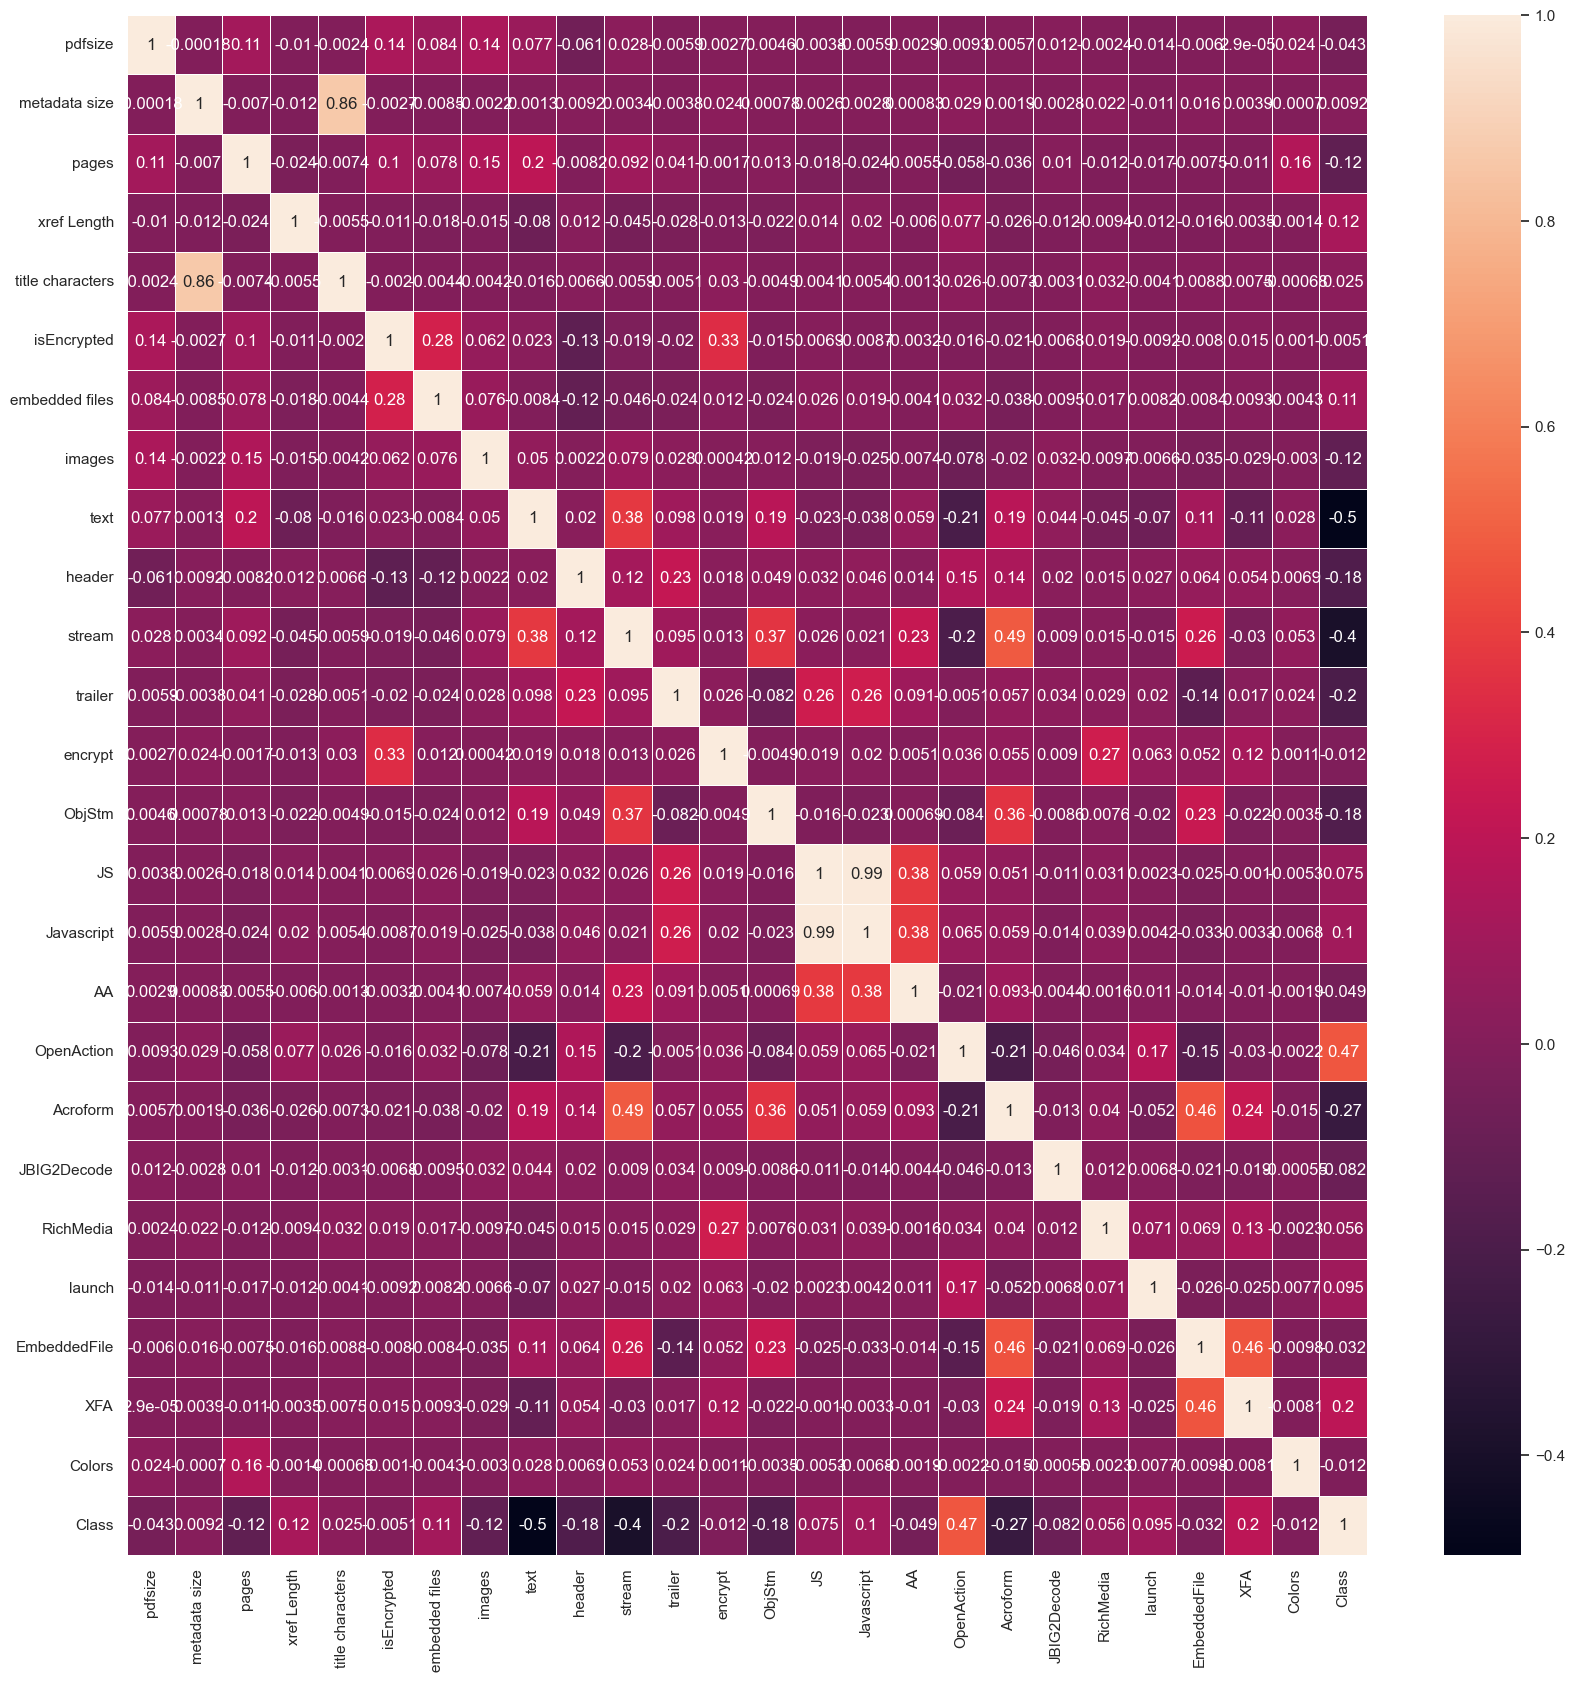

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=.5)
plt.show()


In [12]:
df = df.drop(['JS','title characters'], axis=1)

In [13]:
y = df['Class']
X = df.drop(['File name', 'Class'], axis=1)

In [16]:
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0, shuffle = True)

In [20]:
svm = SVC(gamma='auto', probability=True)
svm.fit(X_train, y_train)
print('Training Data Accuracy:',svm.score(X_train,y_train))
print('Test Data Accuracy:',metrics.accuracy_score(y_test, svm.predict(X_test)))

Training Data Accuracy: 0.9757398027192749
Test Data Accuracy: 0.9700119952019193


In [21]:
predicted_opt_proba = svm.predict_proba(X_test)
print(predicted_opt_proba)
predicted_classes = np.argmax(predicted_opt_proba, axis=1)
print(predicted_classes)

[[9.55453166e-01 4.45468338e-02]
 [1.99277156e-07 9.99999801e-01]
 [1.86917585e-02 9.81308241e-01]
 ...
 [4.46966532e-06 9.99995530e-01]
 [6.39753152e-06 9.99993602e-01]
 [9.99221774e-01 7.78225926e-04]]
[0 1 1 ... 1 1 0]


In [22]:
print(X_scaled.columns)  # If you used scaling


Index(['pdfsize', 'metadata size', 'pages', 'xref Length', 'isEncrypted',
       'embedded files', 'images', 'text', 'header', 'obj', 'endobj', 'stream',
       'endstream', 'xref', 'trailer', 'startxref', 'pageno', 'encrypt',
       'ObjStm', 'Javascript', 'AA', 'OpenAction', 'Acroform', 'JBIG2Decode',
       'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'Colors'],
      dtype='object')


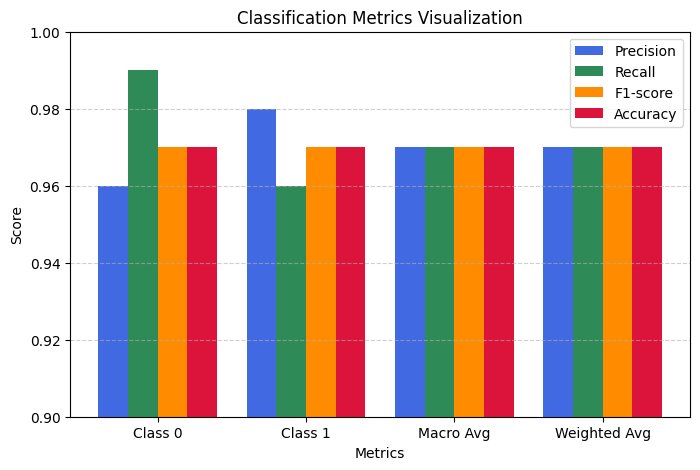

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
categories = ["Class 0", "Class 1", "Macro Avg", "Weighted Avg"]
precision = [0.96, 0.98, 0.97, 0.97]
recall = [0.99, 0.96, 0.97, 0.97]
f1_score = [0.97, 0.97, 0.97, 0.97]
accuracy = [0.97] * 4  # Accuracy is the same across all

x = np.arange(len(categories))  # Label locations

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))
width = 0.2

# Plot bars
ax.bar(x - 1.5*width, precision, width, label="Precision", color="royalblue")
ax.bar(x - 0.5*width, recall, width, label="Recall", color="seagreen")
ax.bar(x + 0.5*width, f1_score, width, label="F1-score", color="darkorange")
ax.bar(x + 1.5*width, accuracy, width, label="Accuracy", color="crimson")

# Labels and formatting
ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Classification Metrics Visualization")
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_ylim(0.9, 1.0)
ax.legend()
ax.grid(axis='y', linestyle="--", alpha=0.6)

# Show plot
plt.show()


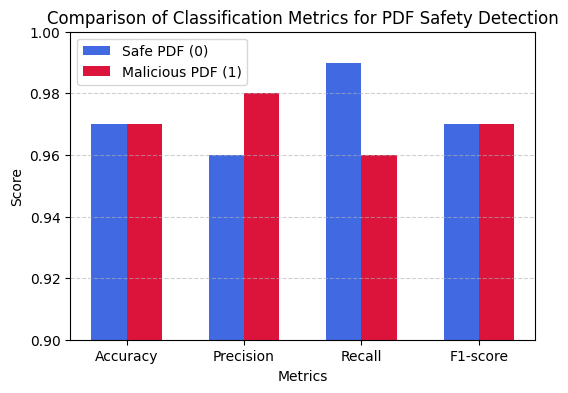

In [3]:
# Data for plotting
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
safe_pdf = [0.97, 0.96, 0.99, 0.97]  # Class 0 (Safe PDF)
malicious_pdf = [0.97, 0.98, 0.96, 0.97]  # Class 1 (Malicious PDF)

x = np.arange(len(metrics))  # Label locations

# Plot setup
fig, ax = plt.subplots(figsize=(6, 4))
width = 0.3

# Plot bars
ax.bar(x - width/2, safe_pdf, width, label="Safe PDF (0)", color="royalblue")
ax.bar(x + width/2, malicious_pdf, width, label="Malicious PDF (1)", color="crimson")

# Labels and formatting
ax.set_xlabel("Metrics")
ax.set_ylabel("Score")
ax.set_title("Comparison of Classification Metrics for PDF Safety Detection")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.9, 1.0)
ax.legend()
ax.grid(axis='y', linestyle="--", alpha=0.6)

# Show plot
plt.show()


In [1]:
joblib.dump(svm, "svm_model.pkl")  # Save trained SVM model
joblib.dump(scaler, "scaler.pkl")  # Save the trained scaler


NameError: name 'joblib' is not defined

In [30]:
import os
import re
import numpy as np
import pandas as pd
import PyPDF2
from pdfminer.high_level import extract_text
import pdfid

def extract_pdf_features(pdf_path):
    try:
        with open(pdf_path, "rb") as f:
            pdf_reader = PyPDF2.PdfReader(f)
            metadata = pdf_reader.metadata
            num_pages = len(pdf_reader.pages)

            # Initialize feature dictionary
            features = {
                "pdfsize": os.path.getsize(pdf_path),  # File size in bytes
                "metadata size": len(str(metadata)) if metadata else 0,
                "pages": num_pages,
                "xref Length": 0,
                "isEncrypted": 1 if pdf_reader.is_encrypted else 0,
                "embedded files": 0,
                "images": 0,
                "text": 1 if extract_text(pdf_path) else 0,
                "header": 1 if re.search(r'%PDF-\d\.\d', open(pdf_path, "rb").read(10).decode(errors="ignore")) else 0,
                "obj": 0, "endobj": 0, "stream": 0, "endstream": 0,
                "xref": 0, "trailer": 0, "startxref": 0, "pageno": num_pages,
                "encrypt": 0, "ObjStm": 0, "Javascript": 0, "AA": 0,
                "OpenAction": 0, "Acroform": 0, "JBIG2Decode": 0,
                "RichMedia": 0, "launch": 0, "EmbeddedFile": 0, "XFA": 0, "Colors": 0
            }

            # Read PDF raw content
            with open(pdf_path, "rb") as pdf_file:
                raw_text = pdf_file.read().decode(errors="ignore")

            # Count occurrences of key PDF structures
            features["xref"] = raw_text.count("xref")
            features["trailer"] = raw_text.count("trailer")
            features["startxref"] = raw_text.count("startxref")
            features["obj"] = raw_text.count("obj")
            features["endobj"] = raw_text.count("endobj")
            features["stream"] = raw_text.count("stream")
            features["endstream"] = raw_text.count("endstream")

            # Check for potential threats
            features["Javascript"] = 1 if "/JS" in raw_text or "/JavaScript" in raw_text else 0
            features["AA"] = 1 if "/AA" in raw_text else 0
            features["OpenAction"] = 1 if "/OpenAction" in raw_text else 0
            features["Acroform"] = 1 if "/AcroForm" in raw_text else 0
            features["JBIG2Decode"] = 1 if "/JBIG2Decode" in raw_text else 0
            features["RichMedia"] = 1 if "/RichMedia" in raw_text else 0
            features["launch"] = 1 if "/Launch" in raw_text else 0
            features["EmbeddedFile"] = 1 if "/EmbeddedFile" in raw_text else 0
            features["XFA"] = 1 if "/XFA" in raw_text else 0

            return pd.DataFrame([features])  # Convert dictionary to DataFrame

    except Exception as e:
        print(f"Error extracting features from {pdf_path}: {e}")
        return None


In [45]:
import joblib

# Load trained model & scaler
svm_model = joblib.load("svm_model.pkl")  # Load SVM model
scaler = joblib.load("scaler.pkl")  # Load StandardScaler

pdf_path = "dummy3.pdf"  # Change to the actual PDF file path

# Extract features from the new PDF
new_pdf_features = extract_pdf_features(pdf_path)

if new_pdf_features is not None:
    # Scale the features using the previously fitted scaler
    new_pdf_scaled = scaler.transform(new_pdf_features)

    # Make a prediction using the trained SVM model
    prediction = svm_model.predict(new_pdf_scaled)
    prediction_proba = svm_model.predict_proba(new_pdf_scaled)

    # Output results
    if prediction[0] == 0:
        print(f"🚨 The PDF '{pdf_path}' is **Malicious** with probability {prediction_proba[0][0]:.4f}")
    else:
        print(f"✅ The PDF '{pdf_path}' is **Safe** with probability {prediction_proba[0][1]:.4f}")


CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

✅ The PDF 'dummy3.pdf' is **Safe** with probability 0.7355


In [24]:
%pip install pdfminer.six




   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.6 MB ? eta -:--:--
   --- ------------------------------------ 0.5/5.6 MB 882.6 kB/s eta 0:00:06
   ----- ---------------------------------- 0.8/5.6 MB 1.0 MB/s eta 0:00:05
   ------- -------------------------------- 1.0/5.6 MB 1.1 MB/s eta 0:00:05
   --------- ------------------------------ 1.3/5.6 MB 1.2 MB/s eta 0:00:04
   ------------- -------------------------- 1.8/5.6 MB 1.3 MB/s eta 0:00:03
   -------------- ------------------------- 2.1/5.6 MB 1.3 MB/s eta 0:00:03
   -------------- ------------------------- 2.1/5.6 MB 1.3 MB/s eta 0:00:03
   ------------------ --------------------- 2.6/5.6 MB 1.3 MB/s eta 0:00:03
   -------------------- ------------------- 2.9/5.6 MB 1.3 MB/s eta 0:00:03
   ---------------------- ----------------- 3.1/5.6 MB 1.3 MB/s eta 0:00:02
   -------------------------- 


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
